## EXECUTION TIME

In [1]:
import random

### INSERTION SORT  

Algoritmo in place per l'_ordinamento_ di un'array, si suddivide la sequenza in due sottosequenze di cui una ordinata e una non ordinata e si inseriscono ad ogni iterazione gli elementi della sequenza non ordinata in quella ordinata secondo l'ordine stabilito. 

In [2]:
def InsertionSort(array_to_sort):
    array_sorted = [i for i in array_to_sort]
    len_array = len(array_sorted)
    
    for j in range(1, len_array):
        el = array_sorted[j]
        i = j -1
        while i >=0 and array_sorted[i] > el:
            array_sorted[i+1] = array_sorted[i]
            i = i-1
        array_sorted[i+1] = el
        
    return array_sorted

Definiamo una funzione che genera un un numero fissato di liste randomiche con lungheza random, entro una certa soglia sempre sccelta da noi, da inserire come input della funzione InsertionSort.
La funzione deve avere come input:
- num : numero di liste che vogliamo generare
- lenn : lunghezza della lista 
- max_el : upper-bound per i numeri che possono essere inseriti in quella lista

In [4]:
def generate_random_list(num, _len, max_el):
    out = []
    for i in range(num):
        lis = [random.randint(1, max_el) for j in range(_len)]
        out.append(lis)
    return out

In [5]:
generate_random_list(5, 20, 20)

[[4, 1, 3, 5, 8, 15, 9, 19, 4, 7, 4, 14, 4, 18, 15, 2, 15, 19, 16, 17],
 [9, 14, 14, 9, 3, 10, 1, 1, 17, 3, 11, 13, 8, 7, 4, 9, 19, 6, 4, 19],
 [15, 19, 11, 11, 7, 11, 20, 8, 10, 20, 18, 13, 13, 19, 7, 7, 4, 4, 17, 18],
 [3, 8, 12, 5, 3, 16, 15, 2, 8, 20, 11, 4, 20, 10, 13, 15, 14, 19, 8, 14],
 [17, 17, 10, 11, 20, 2, 15, 11, 13, 16, 19, 4, 18, 6, 11, 3, 9, 10, 3, 16]]

In [6]:
import datetime
from statistics import mean
import matplotlib.pyplot as plt

Analizziamo quanto è il tempo medio di ordinamento di esecuzione del porgramma che abbiamo implementato. 
Per farlo, è necessario generare randomicamente $n_1$ liste della stessa lunghezza $l$ e applicare il nostro algoritmo ad ogni singola lista $n_2$ volte, con $n_2 > 1$.

Per avere una media, dunque, del tempo di esecuzione dell'algoritmo quando riceve in input liste di lunghezza $l$, dovremmo prima fare la media del tempo di esecuzione della stessa lista sulle $n_2$ prove e poi fare la media delle medie sulle $n_1$ liste diverse generate ranodmicamente.

In [7]:
def measure_time(l, n1, n2):
    """
    input : lunghezza della lista 
    output : media delle medie dei tempi di esecuzione di liste con lungheezza fissata l 
    """
    random_list_ = generate_random_list(n1, l, 100)
    time_ = []
    for j in range(len(random_list_)):
        list_considered = random_list_[j]
        time_fixed_list = []
        for i in range(n2):
            begin_time = datetime.datetime.now()
            InsertionSort(list_considered)
            execution_time = (datetime.datetime.now() - begin_time).microseconds
            time_fixed_list.append(execution_time)
        mean_fixed_list = mean(time_fixed_list)
        time_.append(mean_fixed_list)
    time = mean(time_)
    return time 

Misuriamo ora il tempo medio di esecuzione per liste da lunghezza $1$ a lunghezza $100$ e plottiamo il risultato in un grafico che ha come ascisse la lunghezza e come ordinate il tempo di esecuzione

In [8]:
def execution_time(l_min, l_max, n1, n2):
    y = []
    for i in range(l_max-l_min):
        y_ = measure_time(l_min + i, n1, n2)
        y.append(y_)
    return y 

Plottiamo i risultati utilizzando la libreria _matplotlib_ per confermare i tempi di esecuzione che abbiamo calcolato teoricamente.

In [9]:
def plot_(l_min, l_max, n1, n2):
    x = [i for i in range(l_min, l_max)]
    y = execution_time(l_min, l_max, n1, n2)
    plt.plot(x, y, color = 'm')
    plt.title('InsertionSort() execution time')

Che forma ci aspettiamo che abbia il grafico? 

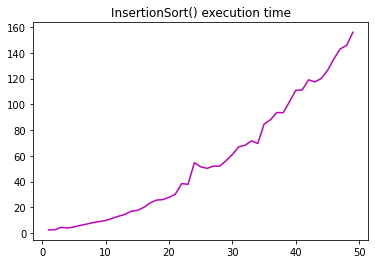

In [10]:
plot_(1, 50, 50, 50)

### BUCKETSORT
Proviamo a vedere che succede se utilizziamo un algoritmo con costo lineare

In [ ]:
def bucket_sort(A):
    B = []
    n = len(A)
    for i in range(0, n):
        B.append([])
    for i in range(0, n):
        bucket = int(A[i] * n) 
        B[bucket].append(A[i])
    for i in range(0, n):
        B[i] = InsertionSort(B[i])
    C = []
    for i in range(0, n):
        C += B[i]
    return C

In [11]:
def generate_random_list(num, _len):
    out = []
    for i in range(num):
        lis = [random.random() for j in range(_len)]
        out.append(lis)
    return out

In [12]:
# generate_random_list(5, 20)

In [13]:
def measure_time(l, n1, n2):
    """
    input
    l : lunghezza della lista
    n1 : numero di liste generate 
    n2: numero di misurazioni 
    
    output : media delle medie dei tempi di esecuzione di liste con lungheezza fissata l 
    """
    random_list_ = generate_random_list(n1, l)
    time_ = []
    for j in range(len(random_list_)):
        list_considered = random_list_[j]
        time_fixed_list = []
        for i in range(n2):
            begin_time = datetime.datetime.now()
            bucket_sort(list_considered)
            execution_time = (datetime.datetime.now() - begin_time).microseconds
            time_fixed_list.append(execution_time)
        mean_fixed_list = mean(time_fixed_list)
        time_.append(mean_fixed_list)
    time = mean(time_)
    return time 

In [14]:
def execution_time(l_min, l_max, n1, n2):
    y = []
    for i in range(l_max-l_min):
        y_ = measure_time(l_min + i, n1, n2)
        y.append(y_)
    return y 

In [15]:
def plot_(l_min, l_max, n1, n2):
    x = [i for i in range(l_min, l_max)]
    y = execution_time(l_min, l_max, n1, n2)
    plt.plot(x, y, color = 'm')
    plt.title('BucketSort() execution time')

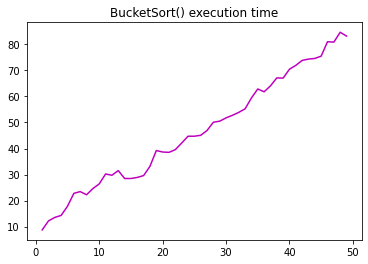

In [16]:
plot_(1, 50, 50, 50)

### BUCKETSORT - WORST CASE SCENARIO 